# ⚛️ H₂ — Ground-State VQE vs Bond Length (Noiseless, UCCSD)

This notebook performs a **bond-length scan** for the hydrogen molecule **H₂**
using the production VQE API:

```python
from vqe.core import run_vqe_geometry_scan
```

We study how the **ground-state energy** varies as a function of the H–H bond
distance using a **UCCSD** ansatz (singles + doubles), which is your canonical
chemistry ansatz for H₂.

---

## Simulation setup

- Molecule: **H₂**
- Geometry: H–H bond length scan
- Distances: **0.5 Å → 2.5 Å** (21 points)
- Basis: **STO-3G**
- Ansatz: **UCCSD**
- Optimizer: **Adam**
- Device: `default.qubit`
- Noise: **None** (noiseless)

All heavy lifting (Hamiltonian construction, ansatz building, optimisation loop,
caching, and plotting) is handled entirely by the package.

In [1]:
import numpy as np
import sys
import os

# Allow local import when running from notebooks/
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from vqe.core import run_vqe_geometry_scan

# 🧬 Bond-Length Grid

We define a simple one-dimensional scan over the H–H bond length.

In [2]:
# H–H bond lengths in Ångström
bond_lengths = np.linspace(0.25, 2.50, 51)
print("Bond-length grid (Å):", bond_lengths)

Bond-length grid (Å): [0.25  0.295 0.34  0.385 0.43  0.475 0.52  0.565 0.61  0.655 0.7   0.745
 0.79  0.835 0.88  0.925 0.97  1.015 1.06  1.105 1.15  1.195 1.24  1.285
 1.33  1.375 1.42  1.465 1.51  1.555 1.6   1.645 1.69  1.735 1.78  1.825
 1.87  1.915 1.96  2.005 2.05  2.095 2.14  2.185 2.23  2.275 2.32  2.365
 2.41  2.455 2.5  ]


# 🚀 Run Geometry Scan via `run_vqe_geometry_scan`

`run_vqe_geometry_scan`:

- Uses the internal H₂ bond-length geometry helper (via `molecule="H2_BOND"`)
- Calls `run_vqe` under the hood for each bond length
- Reuses cached runs when available
- Produces a **Ground-state energy vs bond length** plot and saves it to disk

We use:
- Ansatz: **UCCSD**
- Optimizer: **Adam**
- Single seed: `0`
- 30 optimisation steps per geometry


⚙️ Geometry: bond = 0.250
Step 01/50: E = -0.305001 Ha
Step 02/50: E = -0.301934 Ha
Step 03/50: E = -0.306556 Ha
Step 04/50: E = -0.297219 Ha
Step 05/50: E = -0.307453 Ha
Step 06/50: E = -0.298259 Ha
Step 07/50: E = -0.298924 Ha
Step 08/50: E = -0.308148 Ha
Step 09/50: E = -0.310515 Ha
Step 10/50: E = -0.304808 Ha
Step 11/50: E = -0.303387 Ha
Step 12/50: E = -0.308340 Ha
Step 13/50: E = -0.311367 Ha
Step 14/50: E = -0.309532 Ha
Step 15/50: E = -0.307079 Ha
Step 16/50: E = -0.307740 Ha
Step 17/50: E = -0.310370 Ha
Step 18/50: E = -0.311568 Ha
Step 19/50: E = -0.310350 Ha
Step 20/50: E = -0.309162 Ha
Step 21/50: E = -0.309920 Ha
Step 22/50: E = -0.311316 Ha
Step 23/50: E = -0.311562 Ha
Step 24/50: E = -0.310883 Ha
Step 25/50: E = -0.310523 Ha
Step 26/50: E = -0.310988 Ha
Step 27/50: E = -0.311647 Ha
Step 28/50: E = -0.311743 Ha
Step 29/50: E = -0.311387 Ha
Step 30/50: E = -0.311270 Ha
Step 31/50: E = -0.311564 Ha
Step 32/50: E = -0.311862 Ha
Step 33/50: E = -0.311886 Ha
Step 34/50: E = 

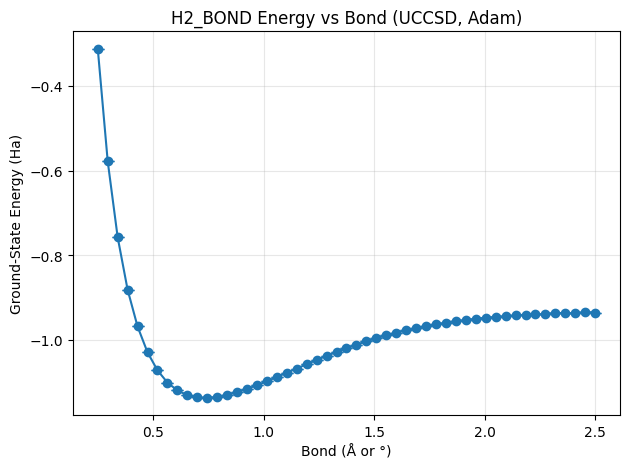

<Figure size 640x480 with 0 Axes>

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/H2_BOND_vqe_geometry_scan_ansUCCSD_optAdam_parambond.png
Minimum energy: -1.137100 ± 0.000000 at bond=0.745


In [3]:
results = run_vqe_geometry_scan(
    molecule="H2_BOND",          # uses the H₂ bond-length geometry helper
    param_name="bond",
    param_values=bond_lengths,
    ansatz_name="UCCSD",
    optimizer_name="Adam",
    steps=50,
    stepsize=0.2,
    seeds=[0],
    force=False,
    mapping="jordan_wigner",
    show=True,                   # display the package-generated plot
)

# 📌 Extract Approximate Equilibrium Bond Length

`run_vqe_geometry_scan` returns a list of tuples:

$$
(r, \langle E \rangle, \sigma_E)
$$

where:
- $r$ is the bond length
- $\langle E \rangle$ is the mean ground-state energy over seeds
- $\sigma_E$ is the standard deviation

In [4]:
# Unpack results into arrays
params, mean_E, std_E = zip(*results)
params = np.array(params, dtype=float)
mean_E = np.array(mean_E, dtype=float)
std_E = np.array(std_E, dtype=float)

# Find approximate minimum
min_idx = int(np.argmin(mean_E))
r_opt = params[min_idx]
E_opt = mean_E[min_idx]
dE_opt = std_E[min_idx]

print(f"\nEstimated equilibrium bond length (H–H): {r_opt:.3f} Å")
print(f"Minimum VQE ground-state energy: {E_opt:.8f} ± {dE_opt:.8f} Ha")


Estimated equilibrium bond length (H–H): 0.745 Å
Minimum VQE ground-state energy: -1.13710037 ± 0.00000000 Ha


---
## Summary

In this notebook you:

- Used the **production VQE API** (`run_vqe_geometry_scan`) as a pure client
- Performed a **noiseless UCCSD VQE** bond-length scan for **H₂**
- Obtained a **Ground-state energy vs bond length** curve
- Extracted an approximate **equilibrium bond length** from the VQE data

All ansatz construction, Hamiltonian generation, device management,
optimisation, caching, and plotting were handled by the package.